# DATA HANDLING AND VISUALIZATION ASSIGNMENT

## PLOTTING EXERCISES

### STUDENT NAME: UKPA NNAEMEKA

### STUDENT ID: 23035351

## Introduction:
  In this assignment I am required to solve two problems using Python, with the libraries (numpy, matplotlib, pandas, and pyarrow). The solved problems are on a single jupyter notebook.

### Problem 1

Using matplotlib, plot the two points (x1, y1) = (3, 5) and (x2, y2) = (7, 2) and the line that passes through both points. The line must continue to the edges of the plot. Plot should demonstrate good style. 

In [17]:
# import python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import numpy as np

The Equation of the line is y = -0.75x + 7.25


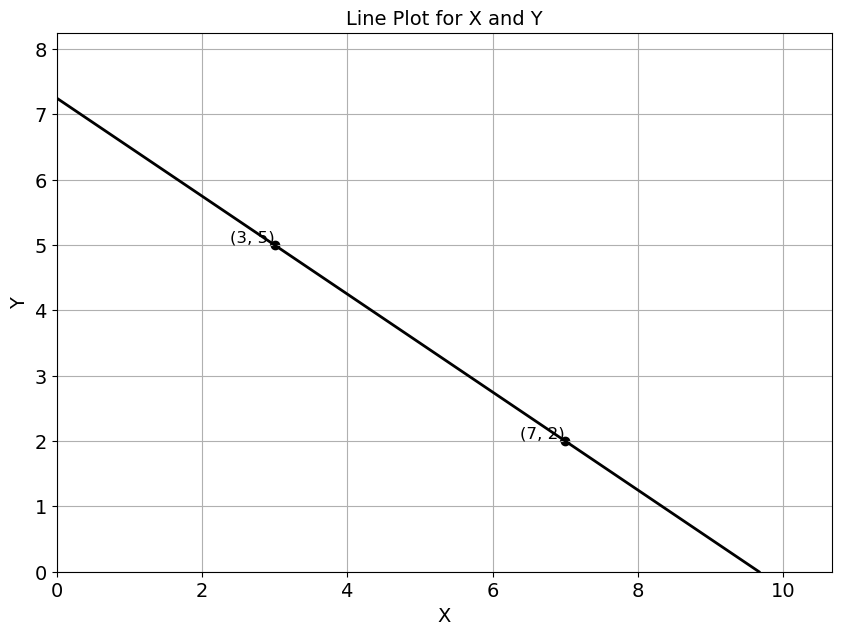

In [18]:
# creating a function to create a line plot
def plot_line(x1, y1, x2, y2):
    # Set the figure size
    plt.figure(figsize=(10, 7))

    # Calculate the slope (m)
    m = (y2 - y1) / (x2 - x1)

    # Calculate the y-intercept (b) using one of the points
    b = y1 - m * x1  # You can also use y2 - m * x2

    # getting points for x0 & y0, when x = 0
    x0 = 0
    y0 = m * x0 + b

    # getting points for x3 & y3, when y = 0
    y3 = 0
    x3 = (y3 - b) / m

    # Formulate the equation in slope-intercept form
    equation = f"y = {m:.2f}x + {b:.2f}"  # Format for two decimal places

    # print the equation of the line
    print(f'The Equation of the line is {equation}')

    # Plot the continuous line passing through the two points
    plt.plot([x0, x1, x2, x3], [y0, y1, y2, y3], color='black', linewidth=2, label='Line')

    # Plot the markers at the two points and add labels
    plt.scatter([x1, x2], [y1, y2], color='black', label='Data Points')
    plt.text(x1, y1, f'({x1}, {y1})', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    plt.text(x2, y2, f'({x2}, {y2})', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

    # Adjust plot limits to ensure the line touches the end of the plot
    plt.xlim(0, max(x0, x1, x2, x3) + 1)
    plt.ylim(0, max(y0, y1, y2, y3) + 1)

    # Add x and y axis labels with font size 14
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)

    # Set font size for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add chart title
    plt.title('Line Plot for X and Y', fontsize=14)

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.show()


# The Function To plot for two points (x1, y1) = (3, 5) and (x2, y2) = (7, 2)
plot_line(3, 5, 7, 2) # In the order (x1, y1, x2, y2)

### Problem 2

Load data from a parquet into python. Create visuals to represent the data as fully as possible. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
df = pd.read_parquet('https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet', engine='pyarrow')
df.head()

,var1,var2,var3,class
0,2.220386,3.088938,5.309324,1
1,-1.112359,1.838144,0.725785,0
2,-0.687695,1.747231,1.059535,0
3,-2.875016,1.718303,-1.156714,0
4,-2.010930,1.327895,-0.683035,0


### Using various methods to get information about the type of data in the file

In [21]:
df.head()

,var1,var2,var3,class
0,2.220386,3.088938,5.309324,1
1,-1.112359,1.838144,0.725785,0
2,-0.687695,1.747231,1.059535,0
3,-2.875016,1.718303,-1.156714,0
4,-2.010930,1.327895,-0.683035,0


In [52]:
df.describe()

,var1,var2,var3,class
count,400.000000,400.000000,400.000000,400.000000
mean,3.469246,2.576392,6.045638,0.627500
std,3.811159,0.533500,4.219296,0.484076
min,-5.577154,0.444386,-5.132768,0.000000
25%,0.068847,2.346191,2.419225,0.000000
50%,4.968903,2.708548,7.961119,1.000000
75%,7.025826,2.951366,9.840901,1.000000
max,9.425215,3.471373,12.048517,1.000000


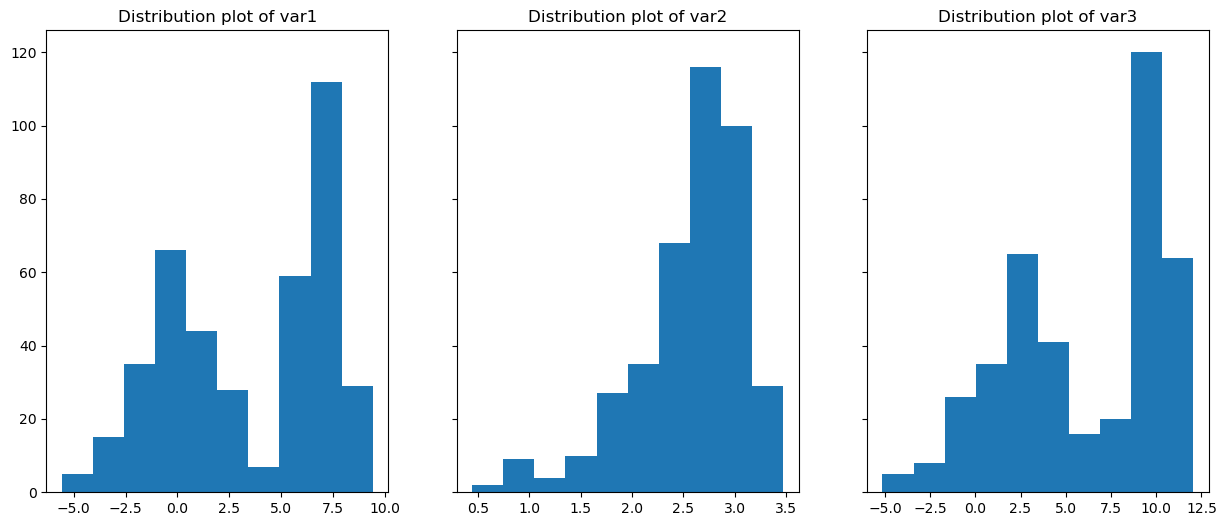

In [51]:
# Plot the distribution of the data

# Create just a figure and only one subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  sharey=True, figsize = (15, 6))
ax1.hist(df["var1"])
ax1.set_title("Distribution plot of var1")
ax2.hist(df["var2"])
ax2.set_title("Distribution plot of var2")
ax3.hist(df["var3"])
ax3.set_title("Distribution plot of var3")

plt.show()

#### Relationship between Var1, Var2 and Class

This plot tends the explore the relationship, spot patterns and trend between var1 and var2 and observe how it differs between classes. 

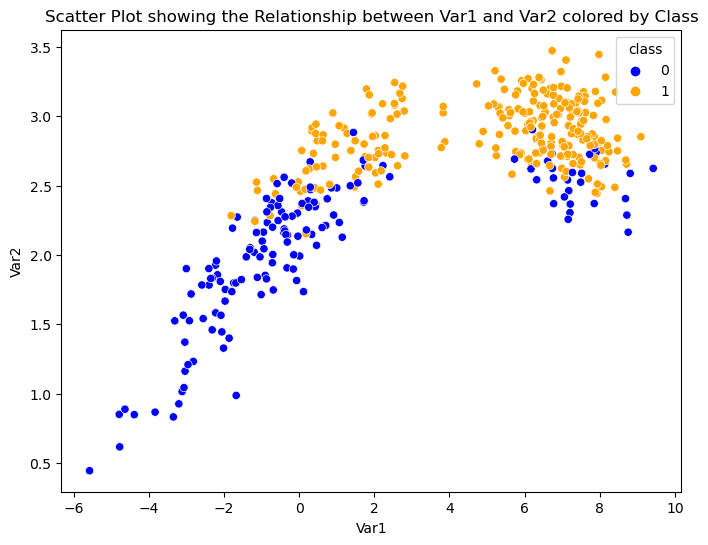

The correlation between var1 and var2 is 0.7359880823406938


In [23]:
# function to create the scatter plot
def create_scatter_plot(data, x_variable, y_variable, color_variable, color_palette=None, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(8, 6)) # for the chart size
    # plotting the scatter plot
    sns.scatterplot(x=x_variable, y=y_variable, hue=color_variable, data=data, palette=color_palette)
    plt.title(title) # for title
    plt.xlabel(xlabel) # for xlabel
    plt.ylabel(ylabel) # for ylabel
    plt.legend(title=color_variable) # for legend
    plt.grid(False)  # Add gridlines if needed

# plot the scatter plot
create_scatter_plot(df, 'var1', 'var2', 'class', 
                    color_palette = ['blue', 'orange'],
                   title= "Scatter Plot showing the Relationship between Var1 and Var2 colored by Class",
                   xlabel= "Var1",
                   ylabel= "Var2")
plt.show()

# to check for correlation
correlation = df['var1'].corr(df['var2'])
print(f'The correlation between var1 and var2 is {correlation}')

**Observation**

The chart above shows a strong positive relatinship between var1 and var2 which means that as var1 increases, var 2 increases and vice versa. Another observation is that records/individuals with class 1 have really high var2 values and var1 values compared to class 0.

**Correlation**

Seeing the correlation between var1 and var2, the next step is to check the correlation between the three variables. The best chart to compare correlation between the three variables is the correlation matrix (Heat Map).

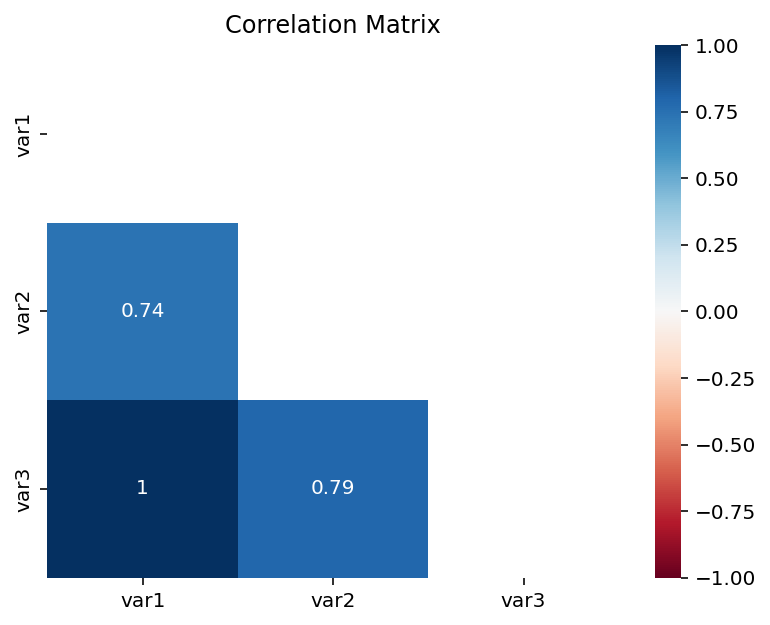

In [24]:
def create_correlation(df, method, title):
    fig, ax = plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(df.corr()))
    sns.heatmap(df.corr(method=method), ax = ax, vmin = -1, vmax = 1, cmap='RdBu', annot=True, mask=mask)
    plt.title(title)
    plt.show()
    
# to plot the correlation heatmap
var_df = df[['var1', 'var2', 'var3']]
create_correlation(var_df, 'pearson', "Correlation Matrix")

**Observation**

From the chart above, the correlation heat map shows that there is a high correlation between the variables. There is a perfect correlation (1.00) between the var1 and var3. The relationship between var1, var2 and var3 is relatively high.

#### Comparing averages between classes

This chart helps to compare the average values of the multiple variables across different classes or categories. This can be useful in various scenarios such as comparing the average performance of different groups. The chart below shows that class 1 has higher average variables compared to class 0.

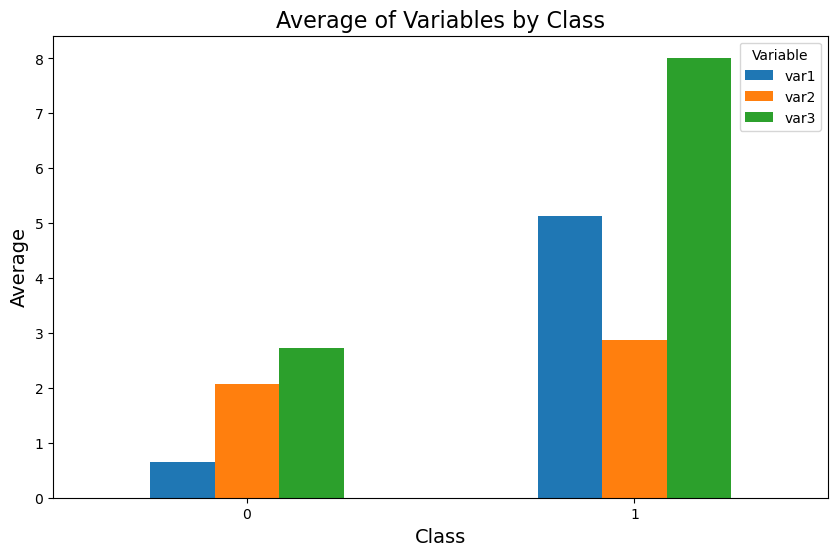

In [25]:
def plot_clustered_bar_chart(dataframe):
    # Group by 'class' and calculate the mean for each variable
    mean_by_class = dataframe.groupby('class').mean()

    # Plot the clustered bar chart
    mean_by_class.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Class', fontsize=14) # for x label
    plt.ylabel('Average', fontsize=14) # for y label
    plt.title('Average of Variables by Class', fontsize=16) # for title
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.legend(title='Variable')  # for the legend
    plt.grid(axis='y') 
    plt.grid(False)# Add gridlines along the y-axis
    plt.show()

# to plot the bar chart
plot_clustered_bar_chart(df)

#### Distribution of the Variables between Classes

Seeing as the average of the variables in class 1 is significantly higher than the average of variables in class 2, the next step taken is to examine the distribution and the spread of the variables in each class.

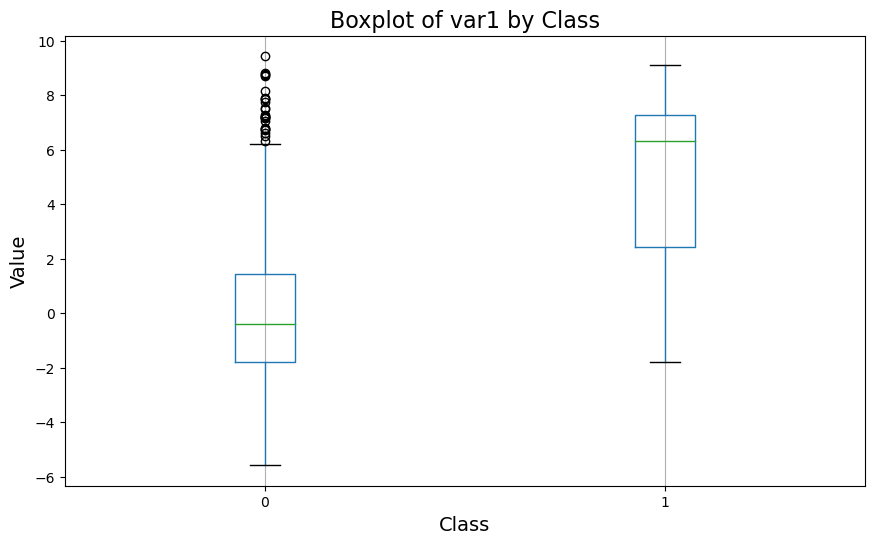

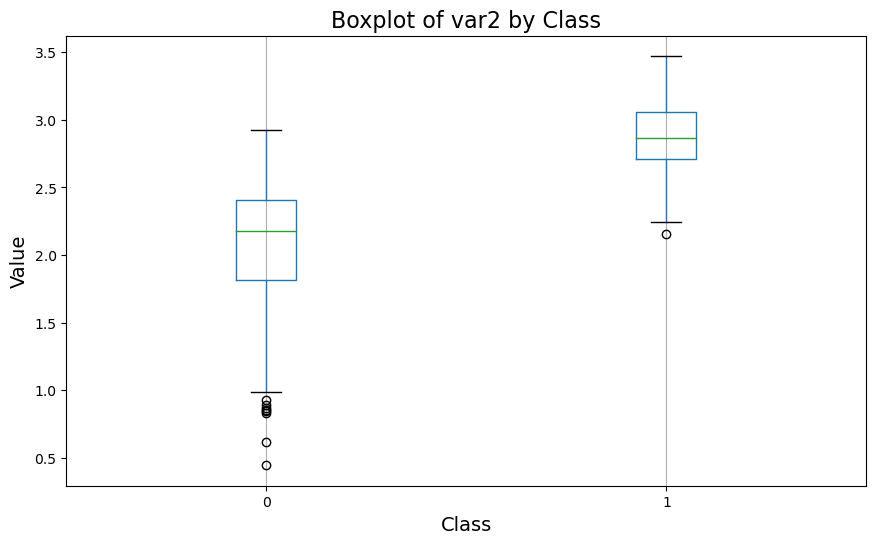

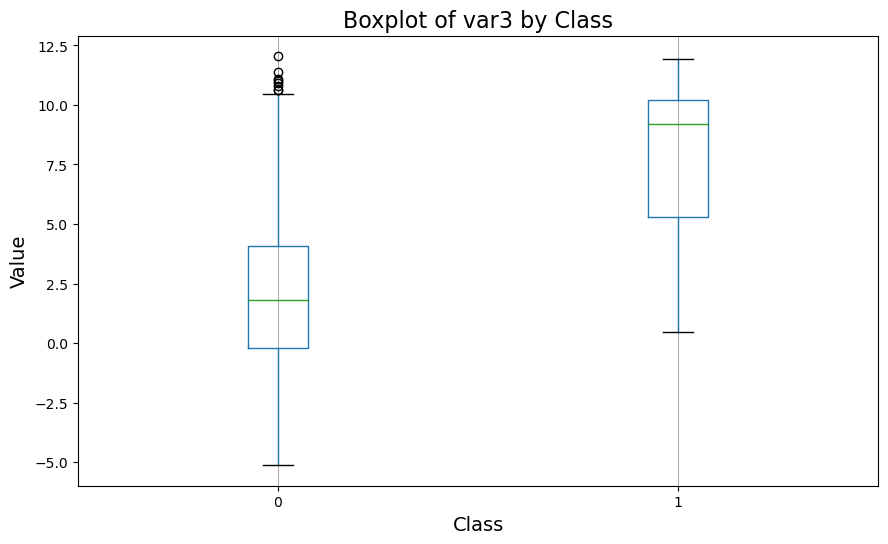

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_boxplot(dataframe):
    # Select the variables to plot
    variables = ['var1', 'var2', 'var3']
    
    # Create a boxplot for each variable grouped by 'class'
    for variable in variables:
        dataframe.boxplot(column=variable, by='class', figsize=(10, 6))
        plt.title(f'Boxplot of {variable} by Class', fontsize=16)
        plt.xlabel('Class', fontsize=14)
        plt.ylabel('Value', fontsize=14)
        plt.suptitle('')  # Remove default title
        plt.grid(axis='y')  # Add gridlines along the y-axis
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
plot_boxplot(df)


**Observation**

The box plots above validate the observation from the previous bar plots that capture the average of the variable by class. The  values in var1, var2 and var3 are much higher and have a high value distribution for class 1 compared to class 0.